# NYC K-8 Student Performance 2016-2024: Analyzing the Effects of the Covid-19 Pandemic Lockdown on Educational Outcomes and More

# _Multivariate Analyses_

## NYC K-8 Public School Demographics 2016-2024

**The NYC Public School System is the largest public school district in the entire United States and among one of the largest in the world as of July 2025.**

**In 2023-24, there were approximately [1.1 million K-12 students enrolled](https://www.schools.nyc.gov/about-us/reports/nycps-data-at-a-glance) across more than 1,800 schools (including charter schools).**

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [38]:
#Store demographic csv in variable 
demo_path = ("/Users/sa14/Desktop/NYC-K-8-Public-School-Student-Performance-2016-2024/data/NYC_K12 Demographic_Snapshot_2015-2024.csv")

#load csv
demo = pd.read_csv(demo_path)

In [45]:
#Examine total student enrollment from 2015-2024
total_enrollment = demo[["Year","Borough","Total Enrollment"]]
total_enrollment 

,Year,Borough,Total Enrollment
0,2015-16,Bronx,241986
1,2016-17,Bronx,241776
2,2017-18,Bronx,239955
3,2018-19,Bronx,236267
4,2019-20,Bronx,235448
5,2020-21,Bronx,227224
6,2021-22,Bronx,176938
7,2022-23,Bronx,170262
8,2023-24,Bronx,167603
9,2015-16,Brooklyn,342119


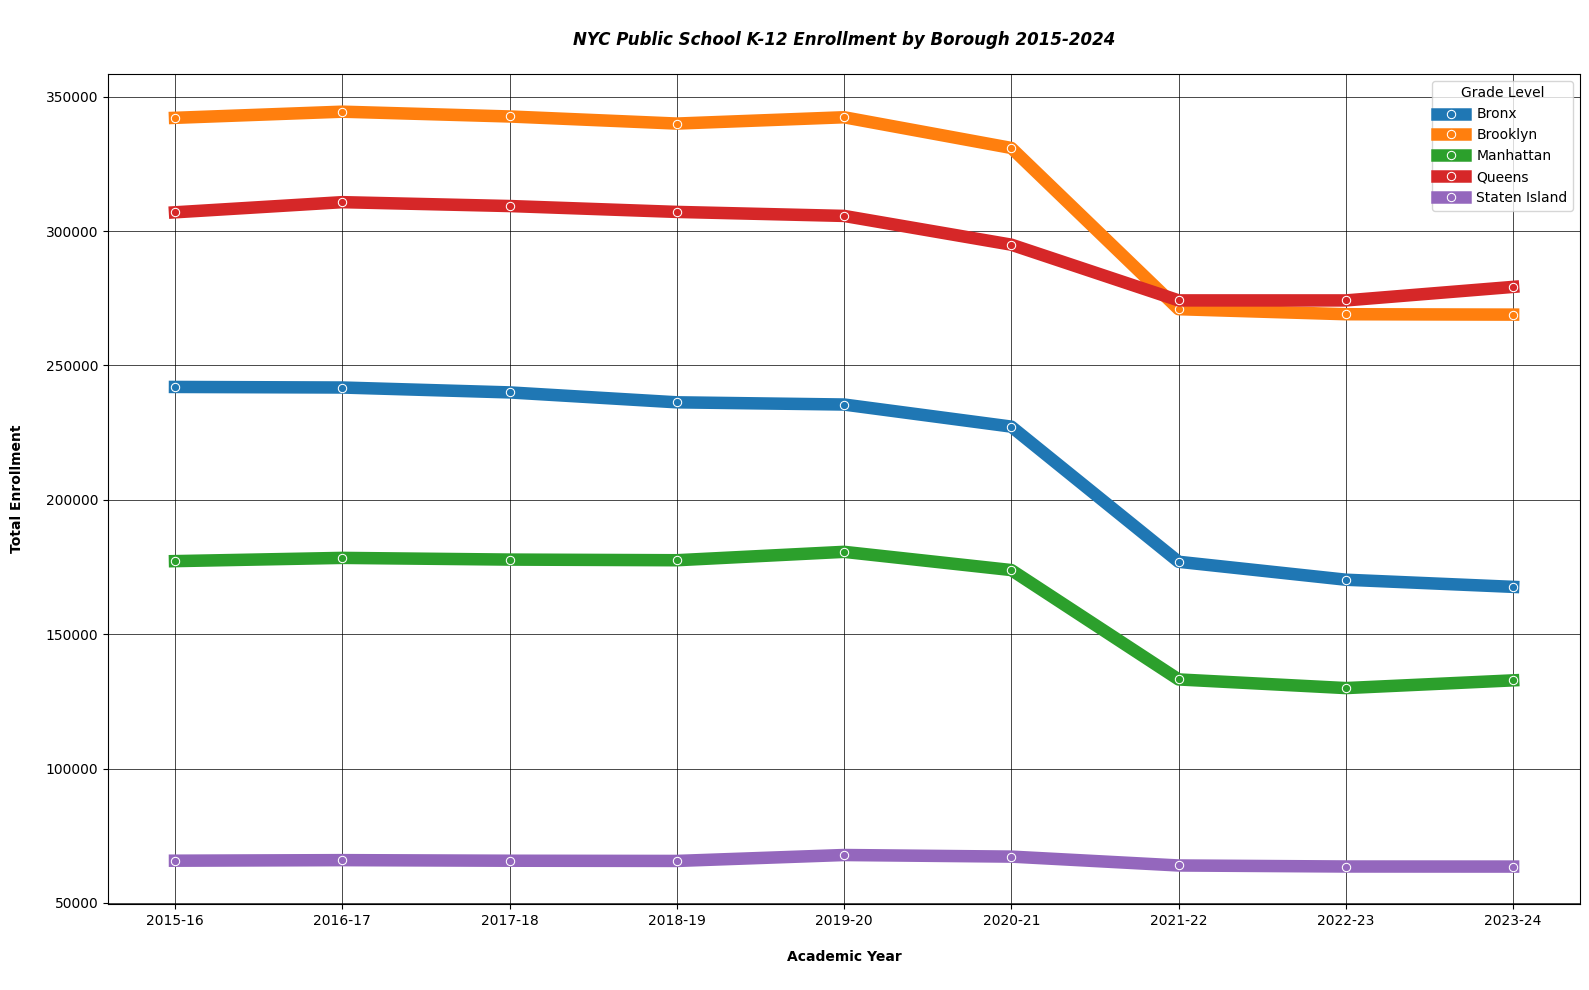

In [49]:
#Visualize student enrollment by borough from 2015-2024

plt.figure(figsize=(16, 10))
sns.lineplot(data=total_enrollment, x="Year", y="Total Enrollment", hue="Borough", marker="o", linewidth = 9.0)
plt.title("\nNYC Public School K-12 Enrollment by Borough 2015-2024\n", 
          weight="bold", style="italic")

#Plot labels and customizations
plt.xlabel("\nAcademic Year\n", weight='bold' )
plt.ylabel("Total Enrollment\n", weight='bold')
plt.grid(color="black", linewidth=0.5)
plt.legend(title="Grade Level")

plt.tight_layout()
plt.show()

In [53]:
#Calculate the changes in enrollment in each of the 5 boroughs from 2020-21, the year of the Pandemic Lockdown, and the 2023-24 academic year 

def calculate_boro_enrollment_change(total_enrollment):
    changes = {}
    
    boroughs = total_enrollment["Borough"].unique()
    for boro in boroughs:
        boro_df = total_enrollment[total_enrollment['Borough'] == boro]
        enrollment_2020 = boro_df[boro_df['Year'] == '2020-21']['Total Enrollment'].sum()
        enrollment_2024 = boro_df[boro_df['Year'] == '2023-24']['Total Enrollment'].sum()
        changes[boro] = (enrollment_2024 - enrollment_2020)
    
    return changes

changes = calculate_boro_enrollment_change(total_enrollment)
for borough, change in changes.items():
    print(f"{borough}: Change in total enrollment between 2020 and 2024 = {change} students\n")


Bronx: Change in total enrollment between 2020 and 2024 = -59621 students

Brooklyn: Change in total enrollment between 2020 and 2024 = -62005 students

Manhattan: Change in total enrollment between 2020 and 2024 = -41034 students

Queens: Change in total enrollment between 2020 and 2024 = -15705 students

Staten Island: Change in total enrollment between 2020 and 2024 = -3709 students



___
> ### **Insights** on the Overall Borough K-12 Enrollment Change from 2020 to 2024 

- Brooklyn had the greatest drop in K-12 enrollment from 2020-21 during the Lockdown to 2023-24. The total enrollment went from 330905 in 2020-21 to 268900 students for the 2023-24 academic year
    
- Staten Island has the lowest overall K-12 student population and experienced the smallest decrease in K-12 enrollment, going from 67235 students during the Pandemic in 2020-21 to 63526 in the 2023-24.

___

In [66]:
#Get averages of racial/ethnic groups across the 5 boroughs
eth_columns = ["# Asian", "# Black", "# Hispanic", "# White", "# Multiple Race Categories Not Represented"]

boro_eth = demo[["Borough"] + eth_columns]

boro_eth_avg = (boro_eth.groupby("Borough", as_index=False)[eth_columns].mean())

#Round averages to whole numbers
boro_eth_avg = boro_eth_avg.round(decimals=0)

boro_eth_avg


,Borough,# Asian,# Black,# Hispanic,# White,# Multiple Race Categories Not Represented
0,Bronx,10831.0,56877.0,134083.0,9615.0,3867.0
1,Brooklyn,54422.0,105244.0,90000.0,58838.0,8300.0
2,Manhattan,20145.0,34999.0,72731.0,27871.0,6612.0
3,Queens,83846.0,49421.0,114875.0,36886.0,10777.0
4,Staten Island,8008.0,8388.0,19058.0,28340.0,1655.0


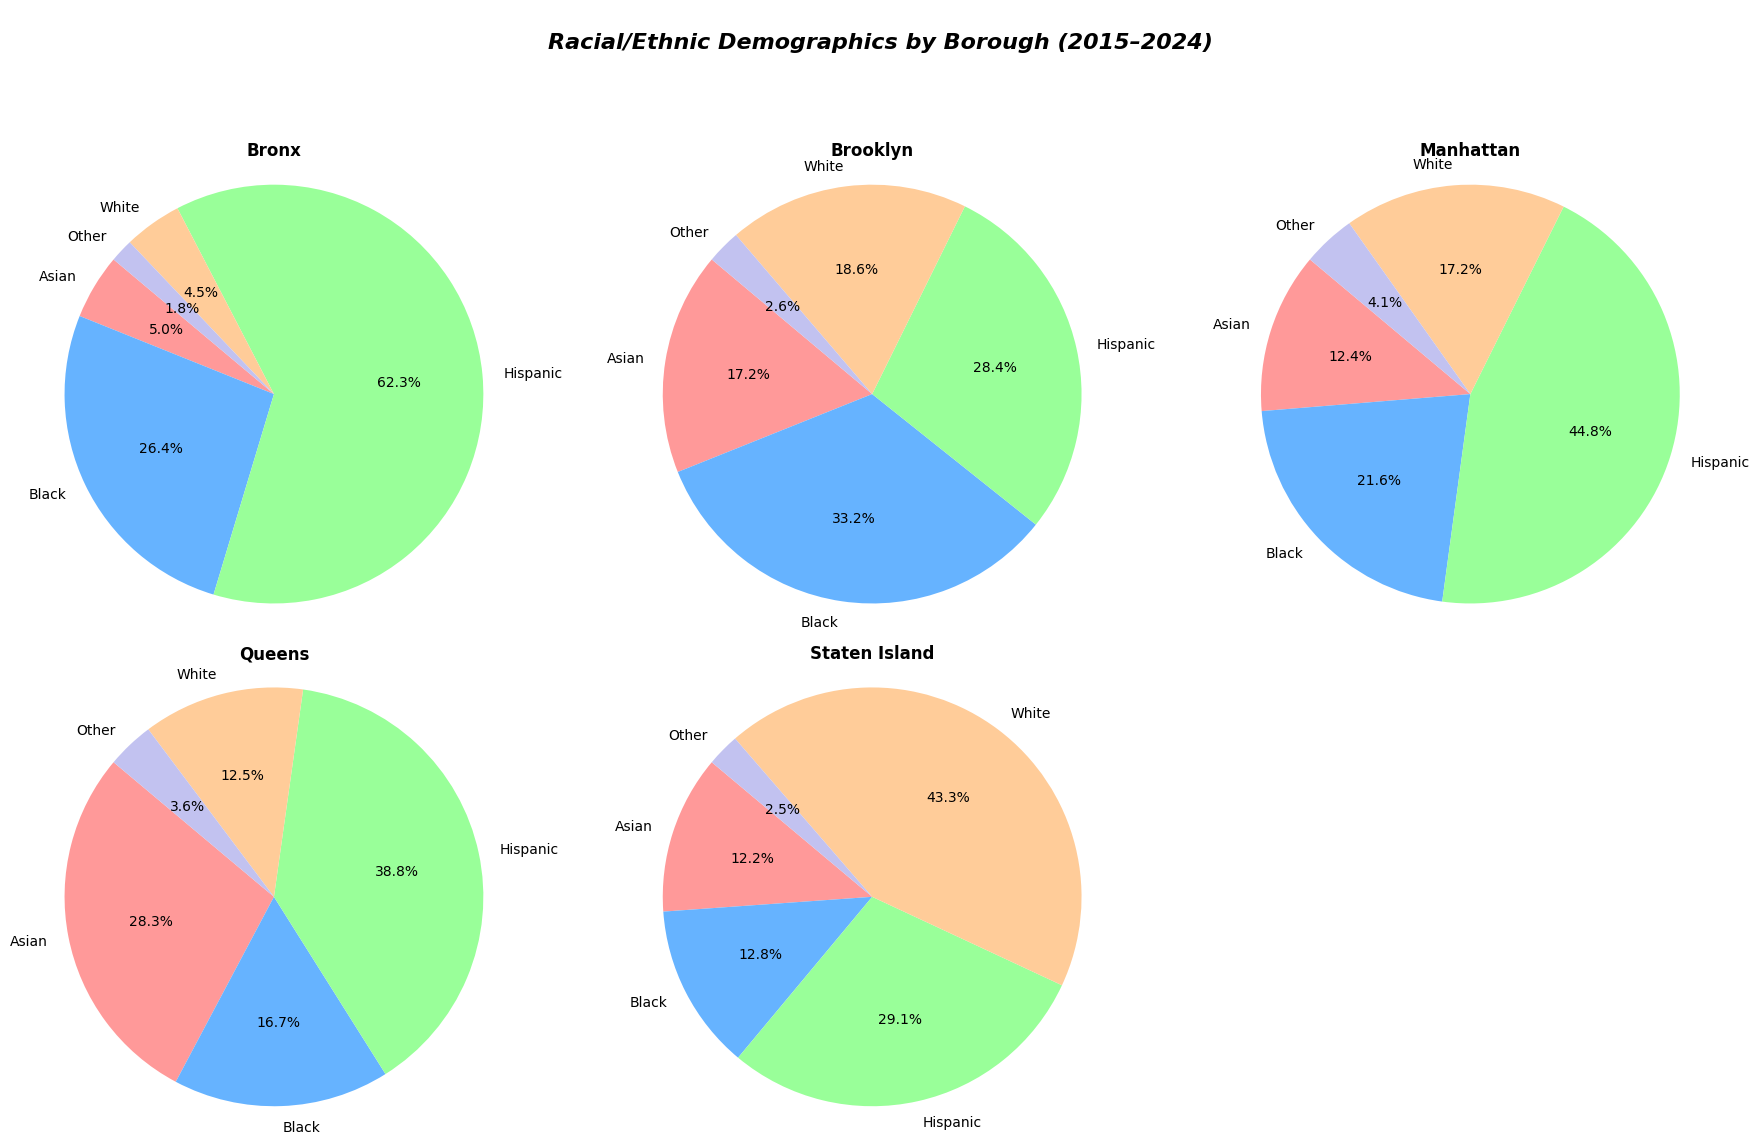

In [72]:
#Visualize average Racial/Ethnic Demographics of the 5 Boroughs (2015-2024) as pie chart subplots

labels = ['Asian', 'Black', 'Hispanic', 'White', 'Other']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

#Set subplot details for piecharts
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

#Function to create pie charts racial/ethnic groups in each of the 5 boroughs

for i, row in enumerate(boro_eth_avg.itertuples(index=False)):
    if i >= 5:
        break  
    data = row[1:] 
    axes[i].pie(data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].axis('equal')  
    axes[i].set_title(row[0], weight="bold") 

# Hide the unused 6th subplot for visual cohesion 
fig.delaxes(axes[5])

plt.suptitle('\nRacial/Ethnic Demographics by Borough (2015–2024)\n', style="italic", 
             weight = "bold", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

___
> ### **Insights** on K-12 Racial/Ethnic Demographics in the 5 Boroughs 

- Hispanic students comprise the majority of K-12 student enrollment Citywide, especially in the Bronx where an average of 62.3% of students are Hispanic.

- Queens has the most racially/ethnically diverse K-12 student population in NYC and is overall considered one of the most ethnically diverse urban areas in the [world](https://www.ny.gov/counties/queens)
    
- **NOTE:** The "Other" Category comprises multiple racial/ethnic groups that are not visually represented such as Native American, Multi-Racial and more.

___